<a href="https://colab.research.google.com/github/sonupp13/CONVOLUTIONAL-NEURAL-NETWORKS-CNN-PROJECT/blob/main/CNN_CAT_%26_DOG_PROJECT_SONU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img #IMAGE DATA GENERATOR USED FOR DATA AUGMENTATION (LIKE FLIPING, CROPING ,ZOOMING)
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [4]:
path ='/content/drive/MyDrive/cat dog cnn/train'
classes = os.listdir(path)
classes


['dogs', 'cats']

Cat Images:


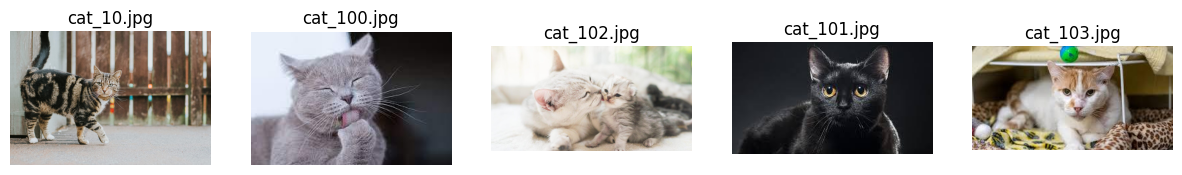

Dog Images:


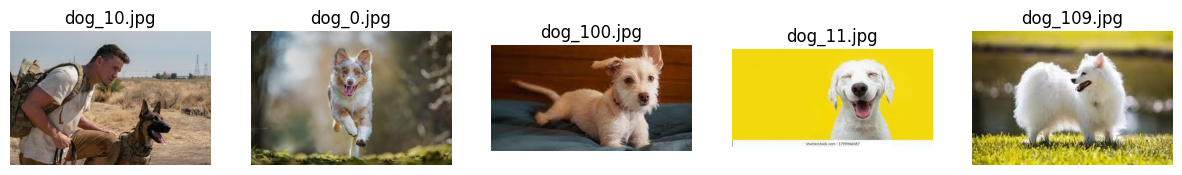

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

cat_dir = '/content/drive/MyDrive/cat dog cnn/train/cats'
dog_dir = '/content/drive/MyDrive/cat dog cnn/train/dogs'
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

def visualize_images(image_dir, image_names, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image_name in enumerate(image_names[:num_images]):
        image_path = os.path.join(image_dir, image_name)
        image = mpimg.imread(image_path)
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_name)

    plt.show()

# Visualize cat images
print("Cat Images:")
visualize_images(cat_dir, cat_names)

# Visualize dog images
print("Dog Images:")
visualize_images(dog_dir, dog_names)



In [6]:
base_dir = '/content/drive/MyDrive/cat dog cnn'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32) #BATCH SIZE 32,64,128 ....


Found 344 files belonging to 2 classes.
Using 310 files for training.
Found 344 files belonging to 2 classes.
Using 34 files for validation.


In [12]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 64)       

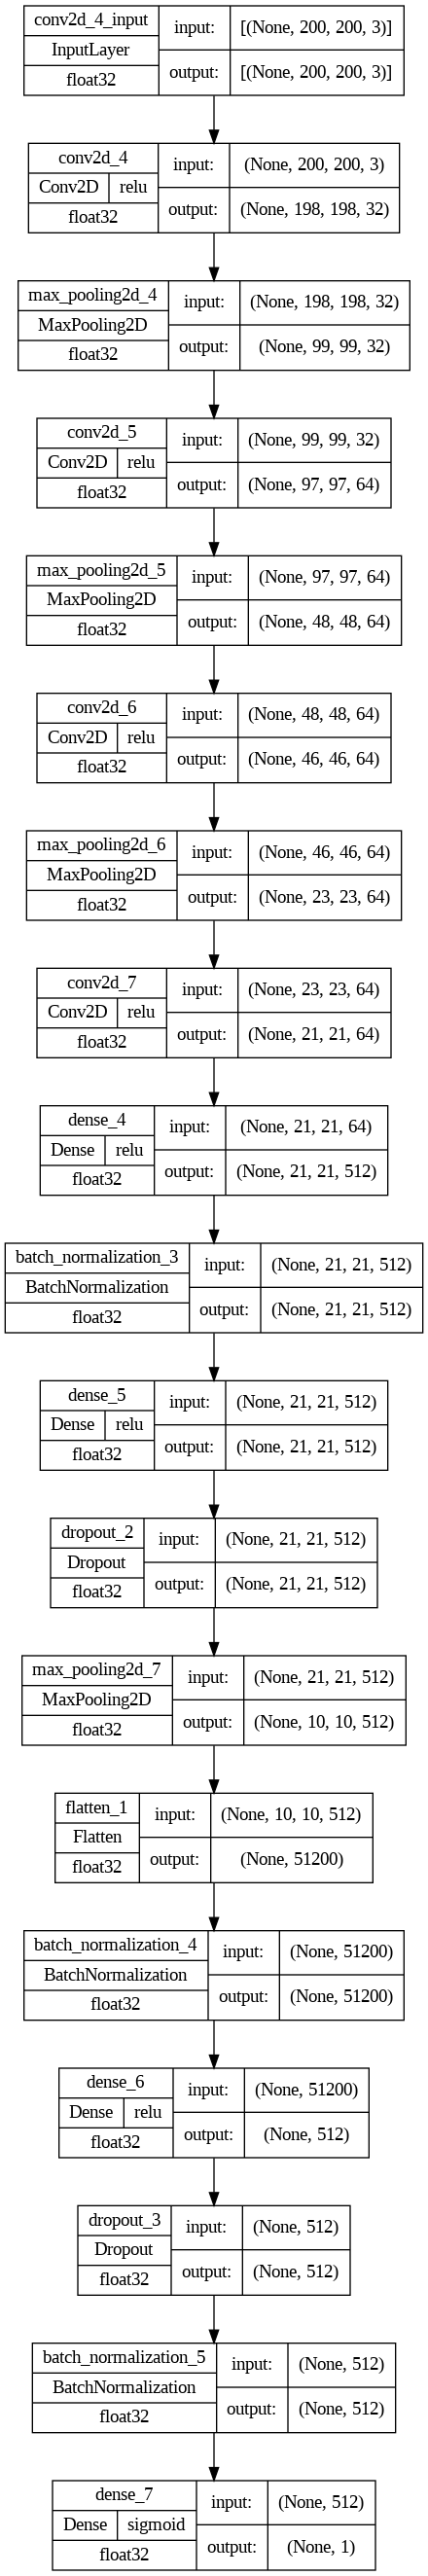

In [14]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [15]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [16]:
history = model.fit(train_datagen,epochs=10,validation_data=test_datagen)


Epoch 1/10
10/10 [==============================] - 66s 4s/step - loss: 1.4826 - accuracy: 0.5355 - val_loss: 3.7363 - val_accuracy: 0.7353
Epoch 2/10
10/10 [==============================] - 39s 4s/step - loss: 0.7280 - accuracy: 0.6419 - val_loss: 1.3911 - val_accuracy: 0.8824
Epoch 3/10
10/10 [==============================] - 35s 3s/step - loss: 0.5214 - accuracy: 0.7419 - val_loss: 1.9572 - val_accuracy: 0.8824
Epoch 4/10
10/10 [==============================] - 35s 3s/step - loss: 0.4280 - accuracy: 0.8290 - val_loss: 0.7639 - val_accuracy: 0.7353
Epoch 5/10
10/10 [==============================] - 34s 3s/step - loss: 0.3672 - accuracy: 0.8516 - val_loss: 4.8139 - val_accuracy: 0.1471
Epoch 6/10
10/10 [==============================] - 33s 3s/step - loss: 0.3350 - accuracy: 0.8806 - val_loss: 0.6059 - val_accuracy: 0.8235
Epoch 7/10
10/10 [==============================] - 35s 3s/step - loss: 0.2944 - accuracy: 0.9065 - val_loss: 2.3811 - val_accuracy: 0.2059
Epoch 8/10
10/10 [==

In [18]:
history.model.save('/content/drive/MyDrive/cat dog cnn/model.h5')

1/1 [==============================] - 0s 74ms/step
dogs


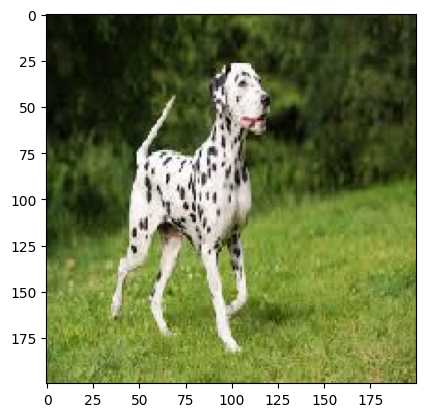

In [21]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/drive/MyDrive/cat dog cnn/test/dogs/dog_130.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("cats")
else:
  print("dogs")
